In [1]:
import numpy as np
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns

Vamos dar uma olhada em algumas das amostras no conjunto de dados.

In [2]:
def load_tmdb_credits(path):
    df = pd.read_csv(path)
    json_columns = ['cast', 'crew']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df

def load_tmdb_movies(path):
    df = pd.read_csv(path)
    df['release_date'] = pd.to_datetime(df['release_date']).apply(lambda x: x.date())
    json_columns = ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df

credits = load_tmdb_credits("/content/drive/MyDrive/Datasets/Movie_rec/tmdb_5000_credits.csv")
movies = load_tmdb_movies("/content/drive/MyDrive/Datasets/Movie_rec/tmdb_5000_movies.csv")

In [3]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de..."
1,285,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de..."
2,206647,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de..."
3,49026,The Dark Knight Rises,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de..."
4,49529,John Carter,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de..."


In [4]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2787965087,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-19,961000000,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2015-10-26,880674609,148.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-07-16,1084939099,165.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-03-07,284139100,132.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Para consistência entre os dois dataframes, vamos renomear a coluna 'id' no dataframe de filmes como 'movie_id'.

In [5]:
movies.rename(columns={"id": "movie_id"}, inplace=True)

#Limpeza dos dados
Podemos ver que alguns dos dados em certos campos são muito brutos nos conjuntos de dados de créditos e filmes. A maioria deles contém muitas informações de que não precisamos, então vamos trata-los. Primeiro, vamos começar com o conjunto de dados de créditos e ver uma amostra dos campos de cast e crew.

In [6]:
credits["cast"].iloc[0]

[{'cast_id': 242,
  'character': 'Jake Sully',
  'credit_id': '5602a8a7c3a3685532001c9a',
  'gender': 2,
  'id': 65731,
  'name': 'Sam Worthington',
  'order': 0},
 {'cast_id': 3,
  'character': 'Neytiri',
  'credit_id': '52fe48009251416c750ac9cb',
  'gender': 1,
  'id': 8691,
  'name': 'Zoe Saldana',
  'order': 1},
 {'cast_id': 25,
  'character': 'Dr. Grace Augustine',
  'credit_id': '52fe48009251416c750aca39',
  'gender': 1,
  'id': 10205,
  'name': 'Sigourney Weaver',
  'order': 2},
 {'cast_id': 4,
  'character': 'Col. Quaritch',
  'credit_id': '52fe48009251416c750ac9cf',
  'gender': 2,
  'id': 32747,
  'name': 'Stephen Lang',
  'order': 3},
 {'cast_id': 5,
  'character': 'Trudy Chacon',
  'credit_id': '52fe48009251416c750ac9d3',
  'gender': 1,
  'id': 17647,
  'name': 'Michelle Rodriguez',
  'order': 4},
 {'cast_id': 8,
  'character': 'Selfridge',
  'credit_id': '52fe48009251416c750ac9e1',
  'gender': 2,
  'id': 1771,
  'name': 'Giovanni Ribisi',
  'order': 5},
 {'cast_id': 7,
  'c

In [7]:
credits["crew"].iloc[0]

[{'credit_id': '52fe48009251416c750aca23',
  'department': 'Editing',
  'gender': 0,
  'id': 1721,
  'job': 'Editor',
  'name': 'Stephen E. Rivkin'},
 {'credit_id': '539c47ecc3a36810e3001f87',
  'department': 'Art',
  'gender': 2,
  'id': 496,
  'job': 'Production Design',
  'name': 'Rick Carter'},
 {'credit_id': '54491c89c3a3680fb4001cf7',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Sound Designer',
  'name': 'Christopher Boyes'},
 {'credit_id': '54491cb70e0a267480001bd0',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Supervising Sound Editor',
  'name': 'Christopher Boyes'},
 {'credit_id': '539c4a4cc3a36810c9002101',
  'department': 'Production',
  'gender': 1,
  'id': 1262,
  'job': 'Casting',
  'name': 'Mali Finn'},
 {'credit_id': '5544ee3b925141499f0008fc',
  'department': 'Sound',
  'gender': 2,
  'id': 1729,
  'job': 'Original Music Composer',
  'name': 'James Horner'},
 {'credit_id': '52fe48009251416c750ac9c3',
  'department': 'Directing',
  

Podemos substituir o dataframe de créditos por um dataframe de pessoas que exibe o papel desempenhado por atores e membros da equipe em vários filmes de uma maneira muito mais clean.


In [8]:
credits.apply(lambda row: [x.update({'movie_id': row['movie_id']}) for x in row['cast']], axis=1)
credits.apply(lambda row: [x.update({'movie_id': row['movie_id']}) for x in row['crew']], axis=1)
credits.apply(lambda row: [person.update({'order': order}) for order, person in enumerate(row['crew'])], axis=1)


0       [None, None, None, None, None, None, None, Non...
1       [None, None, None, None, None, None, None, Non...
2       [None, None, None, None, None, None, None, Non...
3       [None, None, None, None, None, None, None, Non...
4       [None, None, None, None, None, None, None, Non...
                              ...                        
4798    [None, None, None, None, None, None, None, Non...
4799     [None, None, None, None, None, None, None, None]
4800    [None, None, None, None, None, None, None, Non...
4801                                         [None, None]
4802                       [None, None, None, None, None]
Length: 4803, dtype: object

In [9]:
cast_list = []
credits["cast"].apply(lambda x: cast_list.extend(x))
cast = pd.DataFrame(cast_list)
cast["type"] = "cast"

In [10]:
crew_list = []
credits["crew"].apply(lambda x: crew_list.extend(x))
crew = pd.DataFrame(crew_list)
crew["type"] = "crew"

In [11]:
people = pd.concat([cast, crew], ignore_index=True, sort=True)
del credits

In [12]:
people.head()

,cast_id,character,credit_id,department,gender,id,job,movie_id,name,order,type
0,242.0,Jake Sully,5602a8a7c3a3685532001c9a,NaN,2,65731,NaN,19995,Sam Worthington,0,cast
1,3.0,Neytiri,52fe48009251416c750ac9cb,NaN,1,8691,NaN,19995,Zoe Saldana,1,cast
2,25.0,Dr. Grace Augustine,52fe48009251416c750aca39,NaN,1,10205,NaN,19995,Sigourney Weaver,2,cast
3,4.0,Col. Quaritch,52fe48009251416c750ac9cf,NaN,2,32747,NaN,19995,Stephen Lang,3,cast
4,5.0,Trudy Chacon,52fe48009251416c750ac9d3,NaN,1,17647,NaN,19995,Michelle Rodriguez,4,cast


Vamos agora passar para o nosso dataframe de filmes. Alguns dos campos nos filmes contêm muitas informações desnecessárias e também podem ser bastante difíceis de ler. Esses campos são as colunas de genres, palavras-chave, Production_companies, Production_countries e speak_languages. Os dados nesses campos podem ser mais adequados para aparecer em seu próprio quadro de dados para cada campo, para que possamos discernir melhor quais fatores para um determinado campo aparecem para um determinado filme. Devemos, portanto, criar um dataframe separado para cada um dos campos mencionados acima e removê-los de nosso dataframe de filmes.

In [13]:
movies.apply(lambda row: [x.update({'movie_id': row['movie_id']}) for x in row['genres']], axis=1)
movies.apply(lambda row: [x.update({'movie_id': row['movie_id']}) for x in row['keywords']], axis=1)
movies.apply(lambda row: [x.update({'movie_id': row['movie_id']}) for x in row['production_companies']], axis=1)
movies.apply(lambda row: [x.update({'movie_id': row['movie_id']}) for x in row['production_countries']], axis=1)
movies.apply(lambda row: [x.update({'movie_id': row['movie_id']}) for x in row['spoken_languages']], axis=1)

0                         [None, None]
1                               [None]
2       [None, None, None, None, None]
3                               [None]
4                               [None]
                     ...              
4798                            [None]
4799                                []
4800                            [None]
4801                            [None]
4802                            [None]
Length: 4803, dtype: object

In [14]:
genres = []
movies["genres"].apply(lambda x: genres.extend(x))
genres = pd.get_dummies(pd.DataFrame(genres).drop("id", axis=1).set_index("movie_id")).sum(level=0)
genres.rename(columns = lambda x: str(x)[5:], inplace=True)

<ipython-input-14-7f0bfc3f30b6>:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  genres = pd.get_dummies(pd.DataFrame(genres).drop("id", axis=1).set_index("movie_id")).sum(level=0)


In [15]:
keywords = []
movies["keywords"].apply(lambda x: keywords.extend(x))
keywords = pd.get_dummies(pd.DataFrame(keywords).drop("id", axis=1).set_index("movie_id")).sum(level=0)
keywords.rename(columns = lambda x: str(x)[5:], inplace=True)

<ipython-input-15-7af72269b28d>:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  keywords = pd.get_dummies(pd.DataFrame(keywords).drop("id", axis=1).set_index("movie_id")).sum(level=0)


In [16]:
production_companies = []
movies["production_companies"].apply(lambda x: production_companies.extend(x))
production_companies = pd.get_dummies(pd.DataFrame(production_companies).drop("id", axis=1).set_index("movie_id")).sum(level=0)
production_companies.rename(columns = lambda x: str(x)[5:], inplace=True)

<ipython-input-16-18f9d924fc0b>:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  production_companies = pd.get_dummies(pd.DataFrame(production_companies).drop("id", axis=1).set_index("movie_id")).sum(level=0)


In [17]:
production_countries = []
movies["production_countries"].apply(lambda x: production_countries.extend(x))
production_countries = pd.get_dummies(pd.DataFrame(production_countries).drop("iso_3166_1", axis=1).set_index("movie_id")).sum(level=0)
production_countries.rename(columns = lambda x: str(x)[5:], inplace=True)

<ipython-input-17-1d983598e25b>:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  production_countries = pd.get_dummies(pd.DataFrame(production_countries).drop("iso_3166_1", axis=1).set_index("movie_id")).sum(level=0)


In [18]:
spoken_languages = []
movies["spoken_languages"].apply(lambda x: spoken_languages.extend(x))
spoken_languages = pd.get_dummies(pd.DataFrame(spoken_languages).drop("iso_639_1", axis=1).set_index("movie_id")).sum(level=0)
spoken_languages.rename(columns = lambda x: str(x)[5:], inplace=True)

<ipython-input-18-30fd644165c9>:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  spoken_languages = pd.get_dummies(pd.DataFrame(spoken_languages).drop("iso_639_1", axis=1).set_index("movie_id")).sum(level=0)


In [19]:
movies.drop(["genres", "keywords", "production_companies", "production_countries", "spoken_languages"], axis=1, inplace=True)

Vamos vizualizar nosso dataframe de filmes agora:

In [20]:
movies.head()

,budget,homepage,movie_id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count
0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124


Existem alguns campos nos filmes que provavelmente não são muito úteis no momento. Provavelmente não há muitas informações úteis que possamos obter agora com a página inicial de um filme ou seu título original, portanto, excluiremos esses campos. Como já temos informações sobre os gêneros de um determinado filme e palavras-chave relacionadas a ele, talvez também não precisaremos ter uma visão geral do filme ou de seu slogan.

In [21]:
movies.drop(["homepage", "original_title", "overview", "tagline"], axis=1, inplace=True)

Podemos imaginar que o status da maioria dos filmes é 'Released', então provavelmente podemos descartar esse campo também, mas apenas por curiosidade, vamos ver um gráfico de barras mostrando a frequência dos status do filme em nosso conjunto de dados.

<Axes: xlabel='status', ylabel='count'>

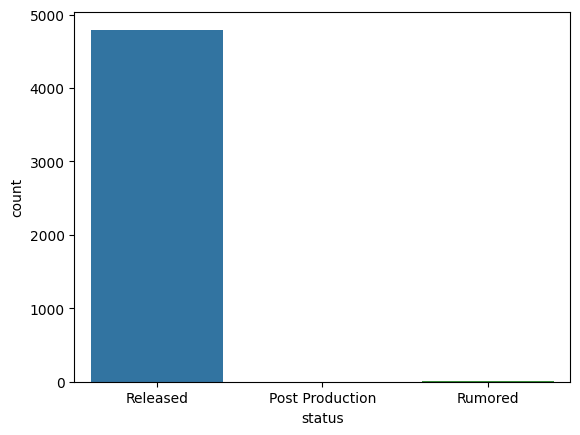

In [22]:
sns.countplot(x=movies["status"])

Claramente, o status dos filmes é 'Released', então simplesmente removeremos esse campo de nosso conjunto de dados.
Como podemos ver também, os filmes em nosso conjunto de dados são predominantemente em inglês. Portanto, este campo provavelmente não renderá muitas informações úteis para nós e podemos deleta-lo.

<Axes: >

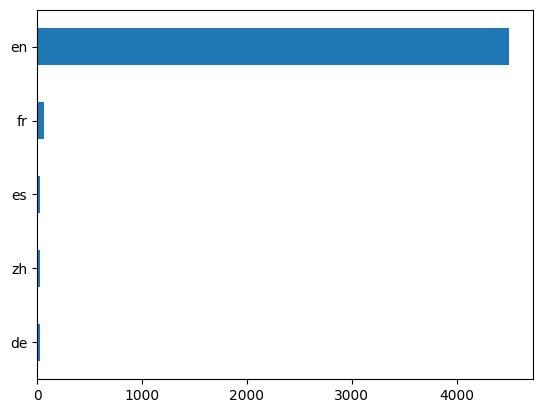

In [23]:
movies["original_language"].value_counts().sort_values().tail().plot.barh()

O idioma original dos filmes em nosso conjunto de dados também pode ser o inglês predominante e, portanto, não fornecer muitas informações úteis para nós. Vamos dar uma olhada na distribuição dos principais idiomas originais em nosso conjunto de dados de filmes.

In [24]:
movies.drop(["status"], axis=1, inplace=True)
movies.drop(["original_language"], axis=1, inplace=True)

Quando se trata da data de lançamento de um filme, estamos menos interessados no dia exato em que foi lançado e mais curiosos para ver em que ano foi lançado ou em que mês do ano foi lançado. adicionamos dois campos ao nosso conjunto de dados de filmes, um para o ano de lançamento e outro para o mês de lançamento e removemos o campo release_date.

In [25]:
movies["release_date"] = pd.to_datetime(movies["release_date"])
movies["release_year"] = movies["release_date"].dt.year
movies["release_month"] = movies["release_date"].dt.month
movies.drop(["release_date"], axis=1, inplace=True)

Aqui setamos o campo movie_id para ser o índice do dataframe de filmes

In [26]:
movies.set_index("movie_id", inplace=True)

Agora temos o seguinte conjunto de dados de filmes muito mais amigavel.

In [27]:
movies.head()


,budget,popularity,revenue,runtime,title,vote_average,vote_count,release_year,release_month
movie_id,,,,,,,,,
19995,237000000,150.437577,2787965087,162.0,Avatar,7.2,11800,2009.0,12.0
285,300000000,139.082615,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,2007.0,5.0
206647,245000000,107.376788,880674609,148.0,Spectre,6.3,4466,2015.0,10.0
49026,250000000,112.312950,1084939099,165.0,The Dark Knight Rises,7.6,9106,2012.0,7.0
49529,260000000,43.926995,284139100,132.0,John Carter,6.1,2124,2012.0,3.0


#Distribuição dos dados

Vamos ver como os diferentes recursos do dataset de filmes são distribuídos.

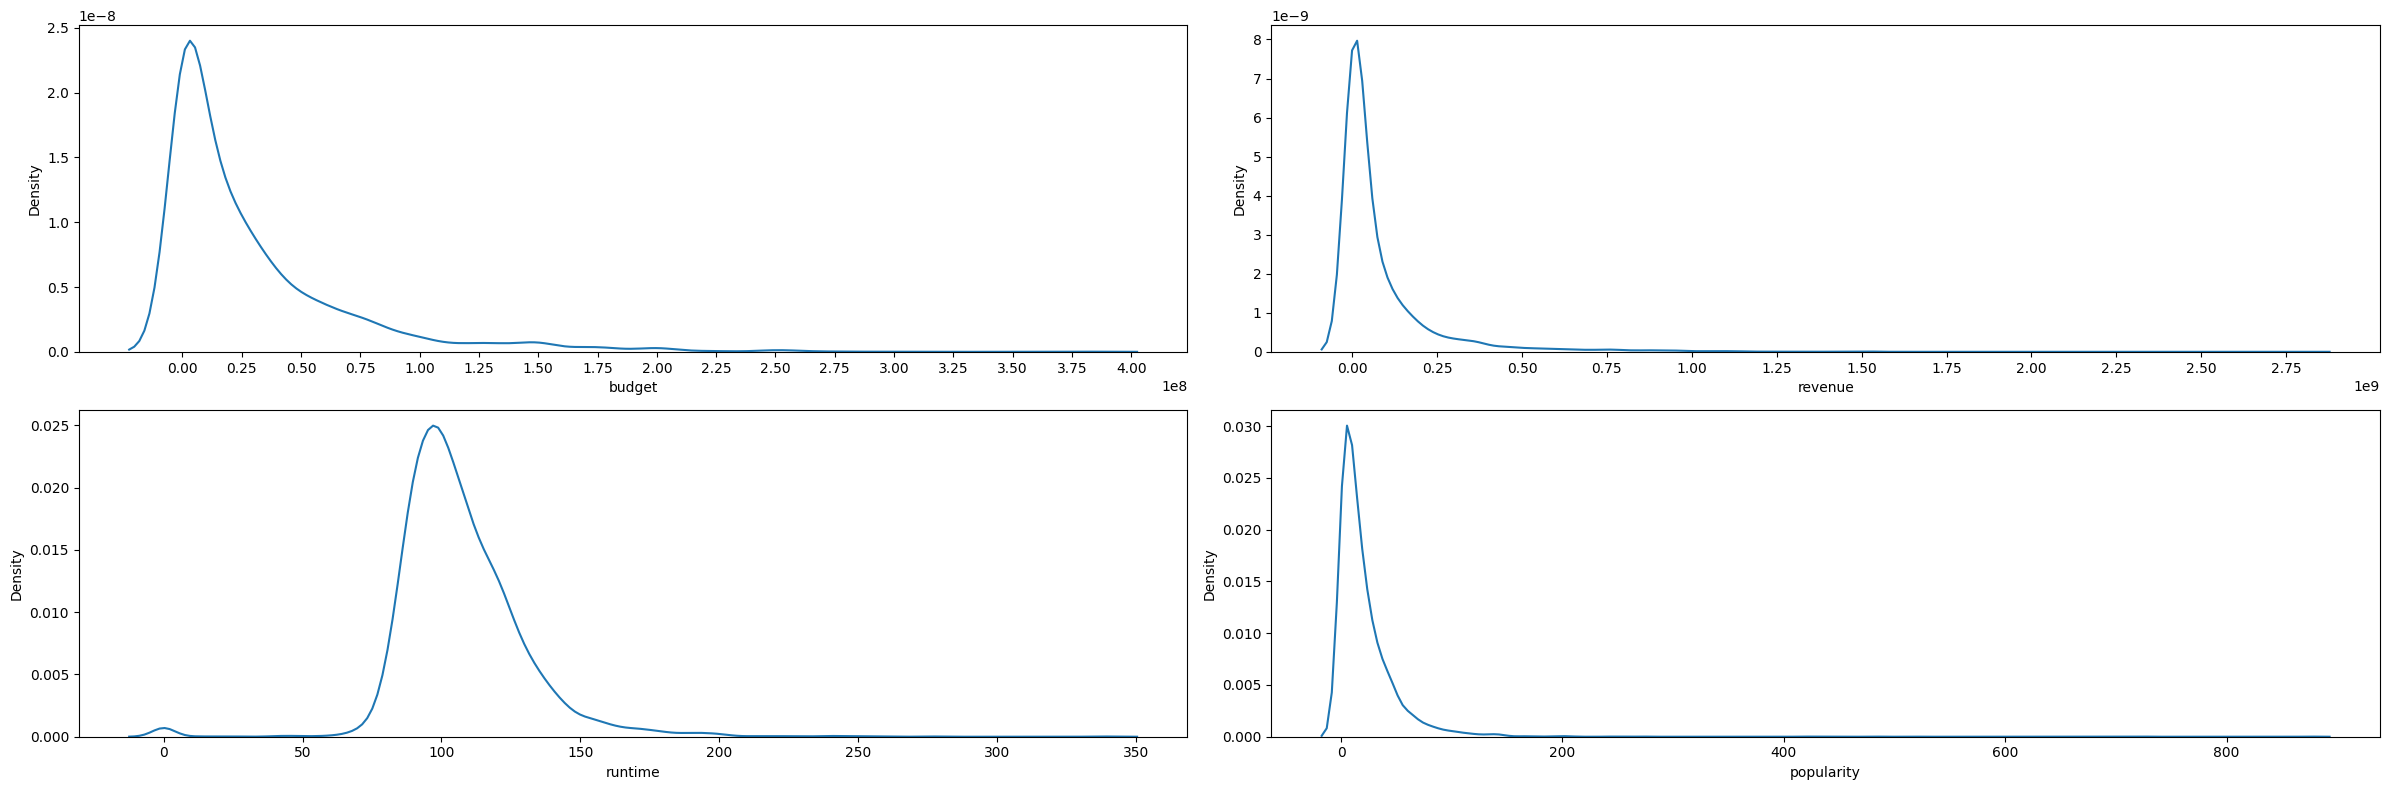

In [28]:
fig1, axarr = plt.subplots(2, 2, figsize=(24, 8))
sns.kdeplot(movies["budget"], ax=axarr[0][0])
axarr[0][0].xaxis.set_ticks(np.arange(0, 4.25e8, 0.25e8))
sns.kdeplot(movies["revenue"], ax=axarr[0][1])
axarr[0][1].xaxis.set_ticks(np.arange(0, 3e9, 0.25e9))
sns.kdeplot(movies["runtime"], ax=axarr[1][0])
sns.kdeplot(movies["popularity"], ax=axarr[1][1])
fig1.tight_layout()

Observando os resultados acima, podemos ver que boa parte dos filmes em nosso dataset tem um orçamento inferior a USS 10 milhões (presumivelmente US$) e uma receita acumulada inferior a USS 100 milhões. Também podemos ver que a maioria dos filmes tem uma duração de cerca de 100 minutos ou 1 hora e 45 minutos.

In [29]:
print(movies['budget'].mean())
print(movies['revenue'].mean())
print(movies['runtime'].mean())
print(movies['popularity'].mean())

29045039.87528628
82260638.65167603
106.87585919600083
21.492300588174057


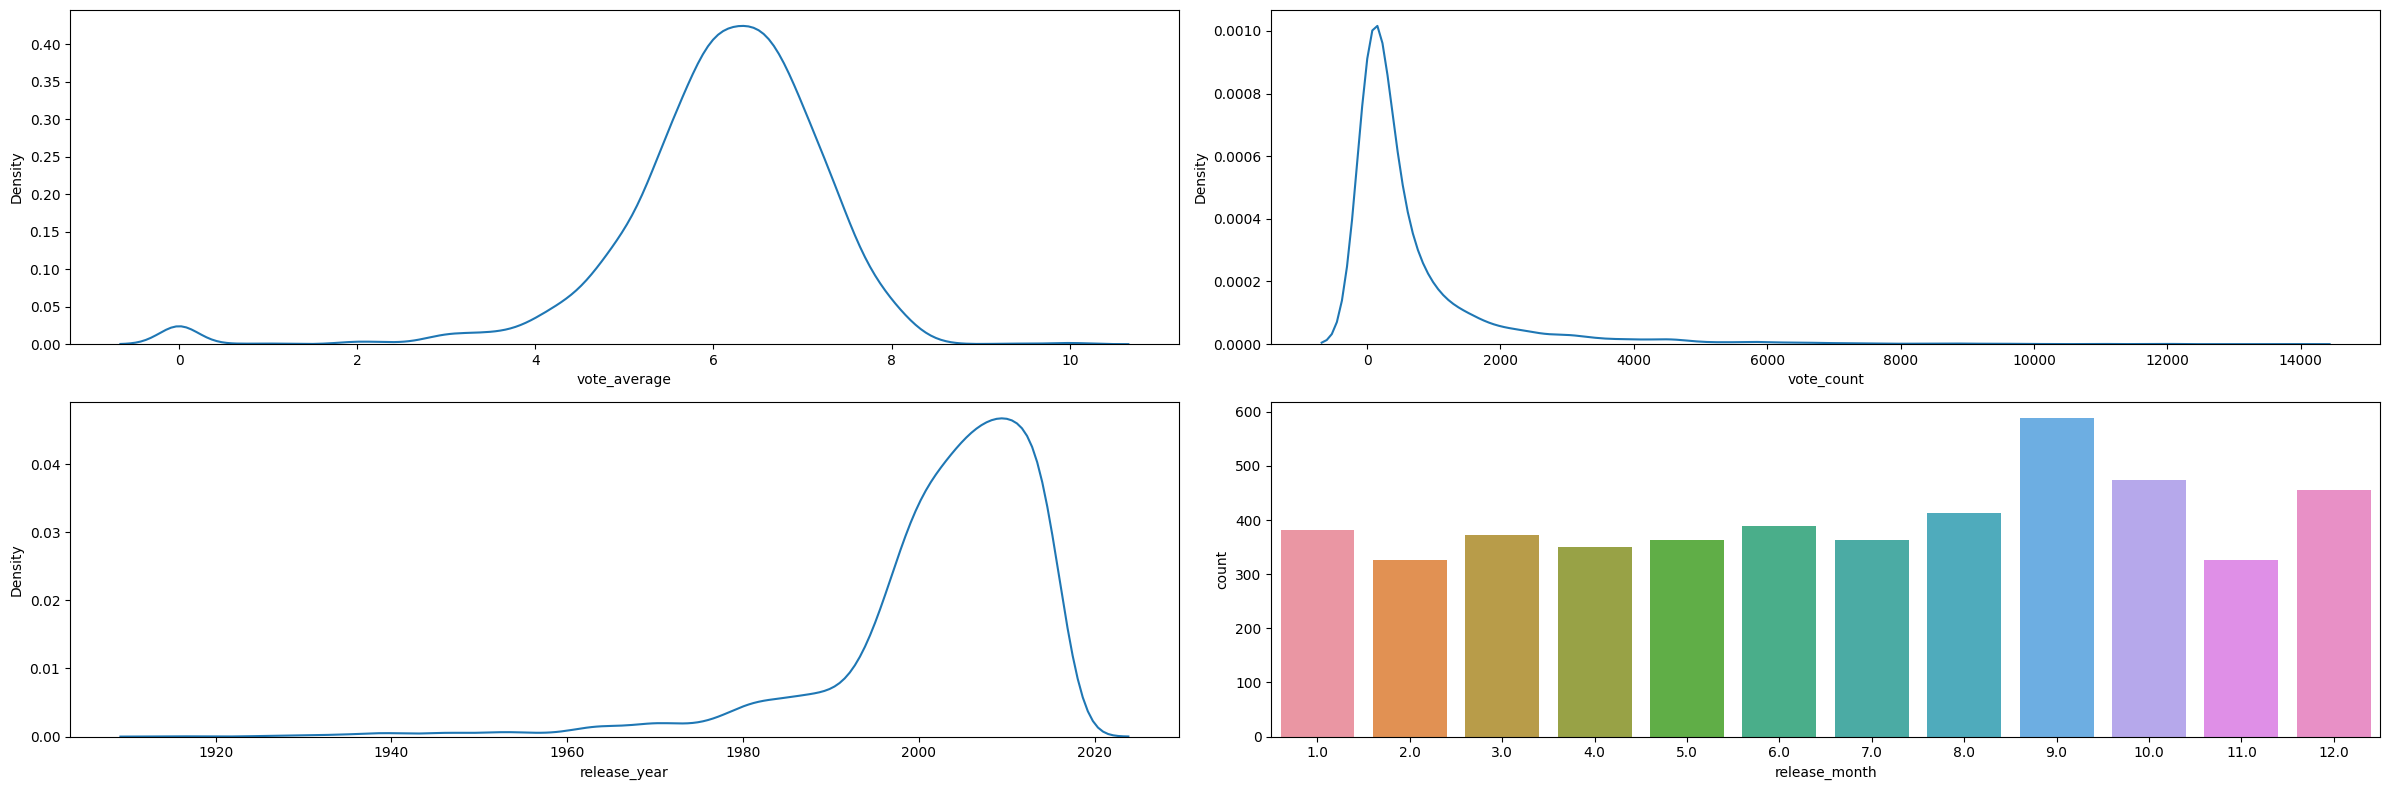

In [30]:
fig2, axarr2 = plt.subplots(2, 2, figsize=(24, 8))
sns.kdeplot(movies["vote_average"], ax=axarr2[0][0])
sns.kdeplot(movies["vote_count"], ax=axarr2[0][1])
sns.kdeplot(movies["release_year"], ax=axarr2[1][0])
sns.countplot(x=movies["release_month"], ax=axarr2[1][1])
fig2.tight_layout()

Em termos de aclamação e reconhecimento de filmes em nosso dataset, podemos ver que a maioria dos filmes tem uma pontuação de popularidade em torno de 20, com uma pontuação média de votos geralmente entre 6,0 e 7,0 e uma contagem de votos inferior a 500. Olhando para as datas de lançamento de filmes em nosso dataset, podemos ver que ele contém principalmente filmes lançados após 1990, distribuídos de maneira bastante uniforme em todos os meses do ano, com a maioria sendo lançada em setembro.

Vamos ver agora quais serão os próximos passos.



*   Achar a melhor forma de juntar as informações dos filmes
*   Encontrar uma forma de detectar similaridade entre filmes
*   Fazer com que com o titulo do filme seja possivel achar similares



In [31]:
df_c = load_tmdb_credits("/content/drive/MyDrive/Datasets/Movie_rec/tmdb_5000_credits.csv")
df_m = load_tmdb_movies("/content/drive/MyDrive/Datasets/Movie_rec/tmdb_5000_movies.csv")

In [32]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [33]:
df_m = df_m[['id','title','genres','keywords','original_language','overview']]
df_m.head()

,id,title,genres,keywords,original_language,overview
0,19995,Avatar,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,Following the death of District Attorney Harve...
4,49529,John Carter,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 818, 'name': 'based on novel'}, {'id':...",en,"John Carter is a war-weary, former military ca..."


In [34]:
df_c = df_c[['title','cast']]
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   4803 non-null   object
 1   cast    4803 non-null   object
dtypes: object(2)
memory usage: 75.2+ KB


In [35]:
df_df = pd.concat([df_m,df_c.cast],axis=1)
df_df.head()

,id,title,genres,keywords,original_language,overview,cast
0,19995,Avatar,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,"In the 22nd century, a paraplegic Marine is di...","[{'cast_id': 242, 'character': 'Jake Sully', '..."
1,285,Pirates of the Caribbean: At World's End,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,"Captain Barbossa, long believed to be dead, ha...","[{'cast_id': 4, 'character': 'Captain Jack Spa..."
2,206647,Spectre,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,A cryptic message from Bond’s past sends him o...,"[{'cast_id': 1, 'character': 'James Bond', 'cr..."
3,49026,The Dark Knight Rises,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,Following the death of District Attorney Harve...,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba..."
4,49529,John Carter,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 818, 'name': 'based on novel'}, {'id':...",en,"John Carter is a war-weary, former military ca...","[{'cast_id': 5, 'character': 'John Carter', 'c..."


In [36]:
df_df.isna().sum()

id                   0
title                0
genres               0
keywords             0
original_language    0
overview             3
cast                 0
dtype: int64

In [37]:
df_df = df_df.fillna(" ")

In [44]:
df_df.iloc[1].cast

[{'cast_id': 4,
  'character': 'Captain Jack Sparrow',
  'credit_id': '52fe4232c3a36847f800b50d',
  'gender': 2,
  'id': 85,
  'name': 'Johnny Depp',
  'order': 0},
 {'cast_id': 5,
  'character': 'Will Turner',
  'credit_id': '52fe4232c3a36847f800b511',
  'gender': 2,
  'id': 114,
  'name': 'Orlando Bloom',
  'order': 1},
 {'cast_id': 6,
  'character': 'Elizabeth Swann',
  'credit_id': '52fe4232c3a36847f800b515',
  'gender': 1,
  'id': 116,
  'name': 'Keira Knightley',
  'order': 2},
 {'cast_id': 12,
  'character': 'William "Bootstrap Bill" Turner',
  'credit_id': '52fe4232c3a36847f800b52d',
  'gender': 2,
  'id': 1640,
  'name': 'Stellan Skarsgård',
  'order': 3},
 {'cast_id': 10,
  'character': 'Captain Sao Feng',
  'credit_id': '52fe4232c3a36847f800b525',
  'gender': 2,
  'id': 1619,
  'name': 'Chow Yun-fat',
  'order': 4},
 {'cast_id': 9,
  'character': 'Captain Davy Jones',
  'credit_id': '52fe4232c3a36847f800b521',
  'gender': 2,
  'id': 2440,
  'name': 'Bill Nighy',
  'order': 5